<a href="https://colab.research.google.com/github/canunz/machinelearning/blob/main/machine_learning_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition (1).csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


# Introducci√≥n:
En este notebook se realizar√° un an√°lisis exploratorio de datos (EDA) sobre el conjunto de datos de Employee Attrition. El objetivo es identificar patrones y factores que influyen en la rotaci√≥n de empleados. Comenzaremos con la identificaci√≥n de variables categ√≥ricas y num√©ricas, seguido de un an√°lisis descriptivo y visualizaciones para entender las relaciones entre las diferentes caracter√≠sticas y la rotaci√≥n *de* personal.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n para visualizaciones
sns.set_style("whitegrid")  # Versi√≥n corregida
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar el dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

# Examinar las primeras filas
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

En este bloque se importan las bibliotecas necesarias para la manipulaci√≥n y visualizaci√≥n de datos. Se configura el estilo de las graficas y el tama√±o de las figuras para asegurar una presentacion clara de los resultados. Luego, se carga el dataset de rotacion de empleados utilizando "pandas", y se examinan las primeras filas para obtener una visi√≥n general de las variables presenten en el conjunto de datos:

*   Pandas: Manipular y analizar datos.
*   numpy: realizar operaciones matematicas y estadisticas.
*   matplotlib y seaborn: crear visualizaciones gr√°ficas.
*   df.head(): muestra las primeras 5 filas del dataset para un primer vistazo.

M√°s que nada, la tabla muestra informacion de los empleados y su rotacion en la empresa, caracteristicas, niveles de satisfaccion y desempe√±o y su historial en la empresa.





# Informaci√≥n general del database
Este bloque permite obtener una vision general de la estructura del dataset. Es util como primer paso en cualquier analisis exploratorio de datos.

In [20]:
# Informaci√≥n general del dataset
print("Informaci√≥n general del dataset:\n")
df.info()

Informaci√≥n general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   i

# Estad√≠sticas descriptivas de variables num√©ricas
El metodo df.describe() entrega un resumen estadistico de las columnas numericas del dataset.

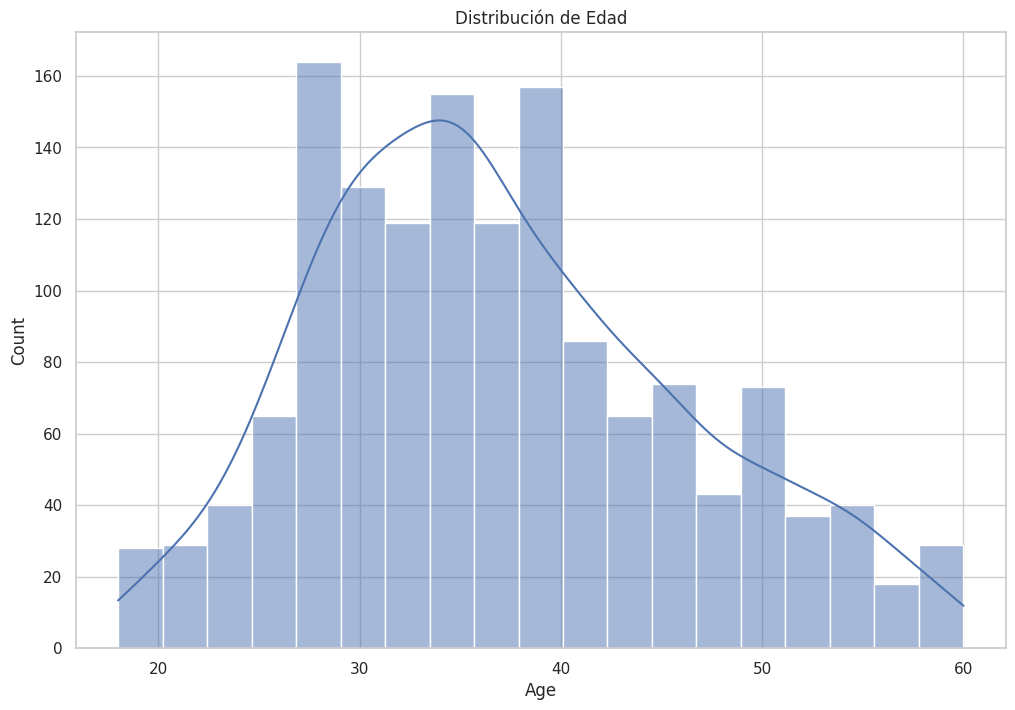

In [55]:
# Estad√≠sticas descriptivas de variables num√©ricas
df.describe()
# Visualizaci√≥n de la distribuci√≥n de las edades
sns.histplot(df['Age'], kde=True)
plt.title("Distribuci√≥n de Edad")
plt.show()

+ Aqu√≠ nos muestra la edad promedio de los empleados que es de al rededor de un 36.9 a√±os.

+ Los sueldos igual varian ampliamente, desde 1000, pero pueden llegar hasta mas de 19000.

+ Permiten entender la experiencia y permanencia de los empleados.



# Identificaci√≥n de variables categ√≥ricas y num√©ricas

In [36]:
# Variables categ√≥ricas: columnas con tipo de datos "object" o "category"
# Definir las columnas categ√≥ricas
categorias = df.select_dtypes(include=['object', 'category']).columns.tolist()


# Variables num√©ricas: columnas con tipo de datos num√©ricos (int64, float64)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Mostrar resultados
print("Variables categ√≥ricas:")
print(categorical_cols)

print("\nVariables num√©ricas:")
print(numerical_cols)


Variables categ√≥ricas:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Variables num√©ricas:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


En este bloque se clasifican las columnas del dataset seg√∫n su tipo de dato:

+ Variables categoricas: Son aquellas que representan categorias y grupos (por ejemplo: Genero, departamento, estado civil). Estas sulen tener tipo de dato object o category en pandas.

+ Variables num√©ricas: contienen valores cuantitativos y permiten operaciones matem√°ticas (por ejemplo: edad, ingresos, a√±os en la empresa). Estas son de tipo int64 O float64.

________________________________________________________________________________


+ Las variables categoricas se analizaran a traves de frecuencias o graficos de barras.

+ Las variables numericas se analizaran a traves de estadisticas descriptivas, histogramas, bloxplots, etc.

# Tendencia Central y de Dispersi√≥n

In [37]:
# Calcular las estad√≠sticas descriptivas de 'Age' usando un solo bloque
age_stats = {
    'Media': df['Age'].mean(),
    'Mediana': df['Age'].median(),
    'Moda': df['Age'].mode()[0],
    'Desviaci√≥n est√°ndar': df['Age'].std(),
    'Varianza': df['Age'].var(),
    'Cuartiles': df['Age'].quantile([0.25, 0.5, 0.75])
}

# Imprimir los resultados
for stat, value in age_stats.items():
    print(f"{stat}: {value}")


Media: 36.923809523809524
Mediana: 36.0
Moda: 35
Desviaci√≥n est√°ndar: 9.135373489136734
Varianza: 83.45504878602227
Cuartiles: 0.25    30.0
0.50    36.0
0.75    43.0
Name: Age, dtype: float64


Este c√≥digo calcula y muestra las estadistica descriptivas de la columna 'Age' (edad) del dataset, que incluyen:

1. Media: Promedio de las edades.
2. Mediana: Valor central de las edades cuando estan ordenadas.
3. Moda: La edad que mas se repite.
4. Desviaci√≥n est√°ndar: Que tanto varian las edades respecto a la media.
5. Varianza: La medida de dispersi√≥n de las edades (cuanto se alejan de la media).
6. Cuartiles: Los valores que dividen las edades en cuatro partes, mostrando la distribuci√≥n de los datos.

El codigo organiza estos calculos en un diccionario y luego imprime los resultado de manera clara. Esto ayuda a entender la distribucion y variabilidad de la edad entre los empleados.

# Histograma De Variables N√∫mericas

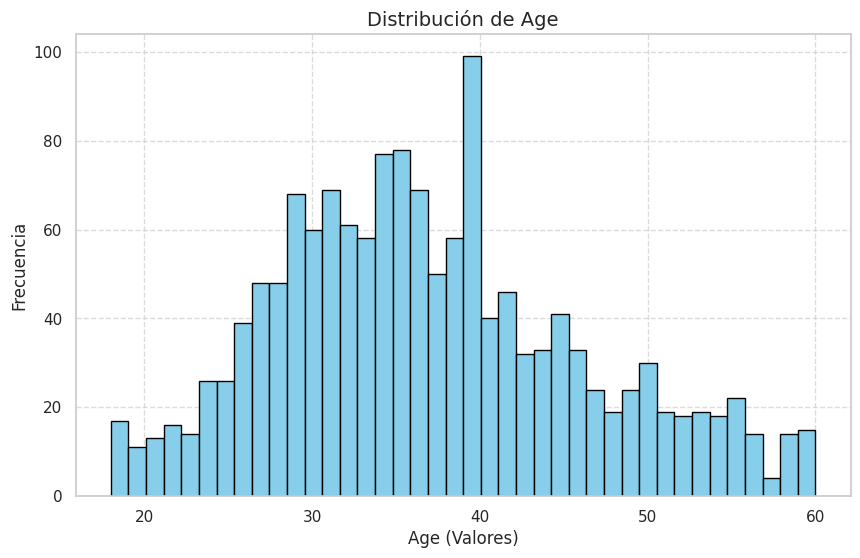

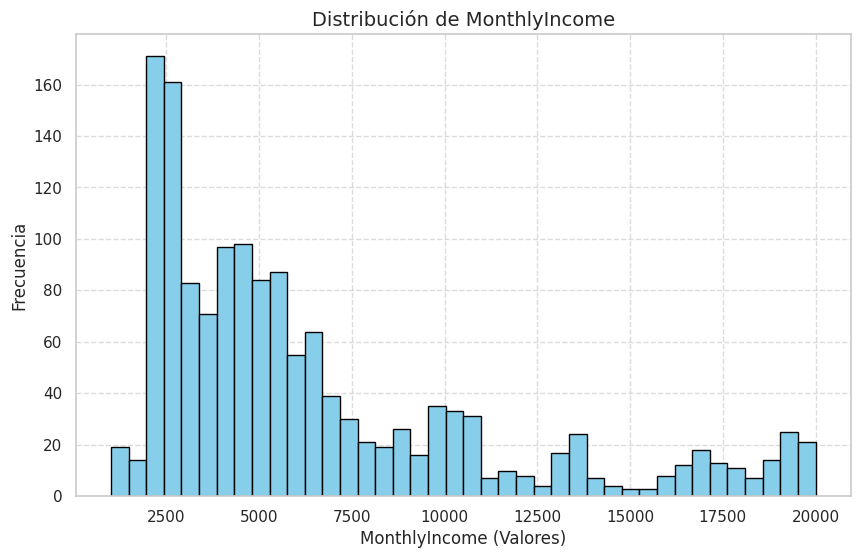

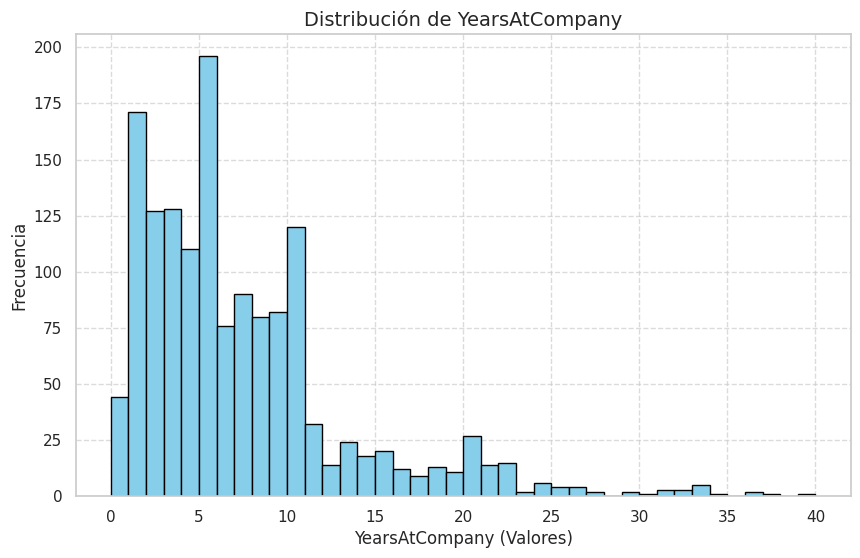

In [38]:
import matplotlib.pyplot as plt

# Definir funci√≥n para graficar histogramas
def plot_histograma(variable, bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(df[variable], bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel(f'{variable} (Valores)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.title(f'Distribuci√≥n de {variable}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Definir las variables num√©ricas para analizar
variables_numericas = ["Age", "MonthlyIncome", "YearsAtCompany"]

# Iterar sobre las variables y graficar su distribuci√≥n
for var in variables_numericas:
    plot_histograma(var, bins=40)  # N√∫mero de bins ajustado a 40 para un an√°lisis m√°s detallado


Este c√≥digo define una funcion llamada plot_hist, que crea y muestra un histograma para la variable n√∫merica especifica del dataset. La funcion realiza lo siguiente:

1. Tama√±o de la figura: Establece el tama√±o de la figura para que sea adecuada para la visualizacion.
2. Histograma: Utiliza plt.hist() para crear el histograma de la variable, con un numero de 50 barras(bins) para representar las frecuencias de los datos.
3. Etiquetas: Define las etiquetas del eje X (nom variable) y del eje Y (frecuencia de los valores).
4. Titulo: Asigna un titulo al grafico que describe la variable.
5. Mostrar el grafico: Utiliza plt.show() para visualizar el histograma generado.

El bloque de codigo posterior recorre las variables numericas "Age" "MonthlyIncome" y "YearsAtCompany" y llama la funcion plot_hits para generar un histograma para cada una de ellas. Esto permite analizar visualmente la distribucion de cda variable en el conjunto de datos.

# BOXPLOTS

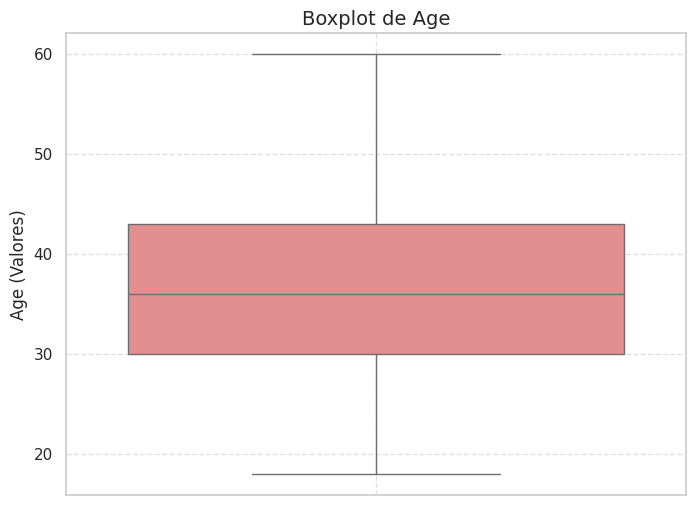

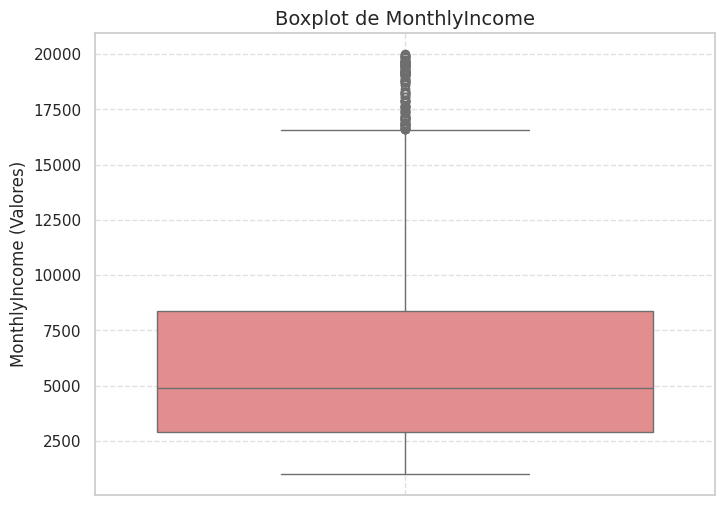

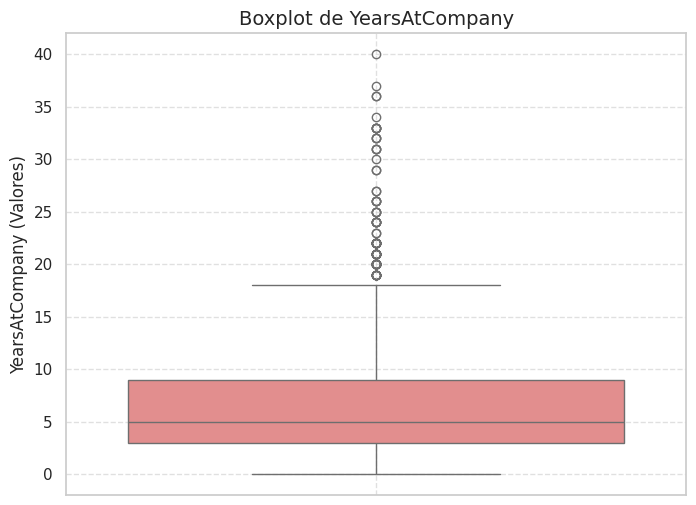

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la lista de variables num√©ricas
variables_numericas = ["Age", "MonthlyIncome", "YearsAtCompany"]

# Iterar sobre cada variable y crear un boxplot
for var in variables_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var], color='lightcoral')
    plt.title(f'Boxplot de {var}', fontsize=14)
    plt.xlabel('')
    plt.ylabel(f'{var} (Valores)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


Esto nos ayuda a entender mejor la distribuci√≥n y dispersi√≥n de las variables numericas clave, como la edad, el ingreso mensual y los a√±os de trabajo en la empresa. El boxplot facilita la identificacion de valores atipicos, lo que podria sugerir situaciones inusuales o errores en los datos.


¬øQue se esta haciendo? Se generan boxplots para las variables numericas selecionadas (age, monthlyIncome, YearsAtCompany).


# Variables Categ√≥ricas

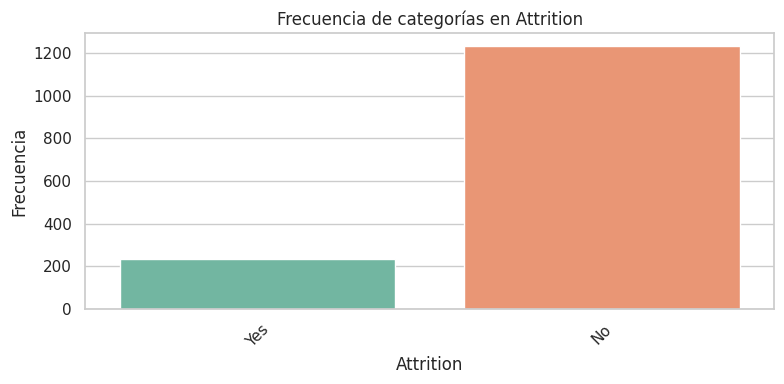

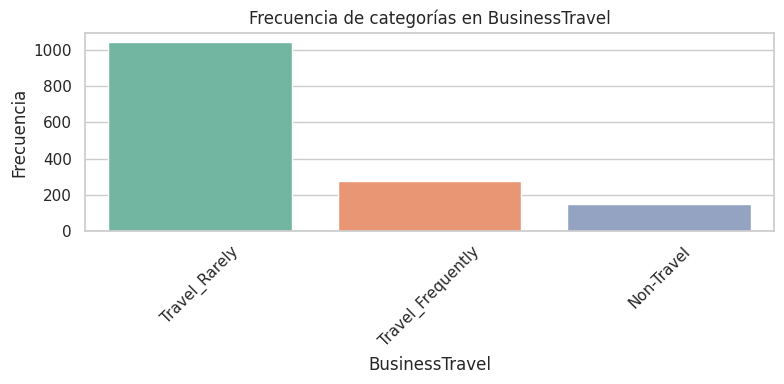

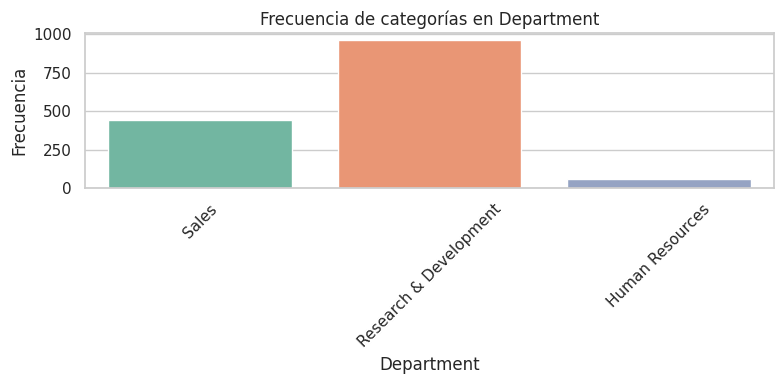

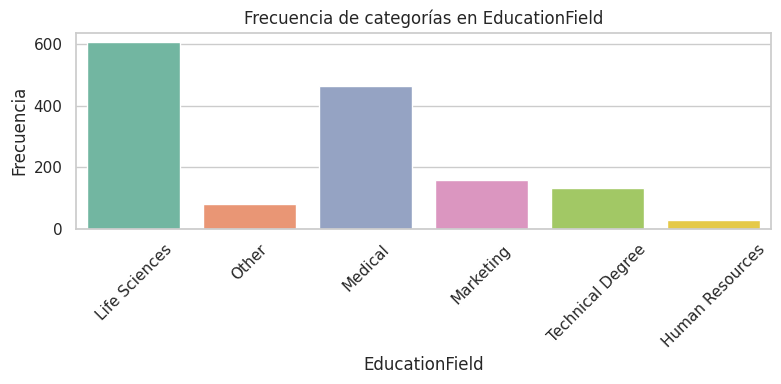

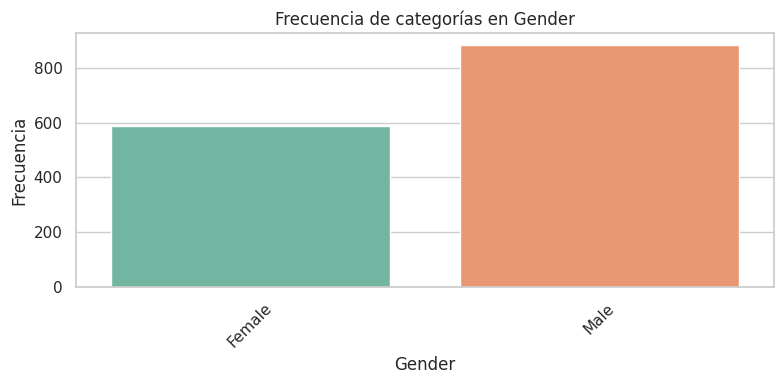

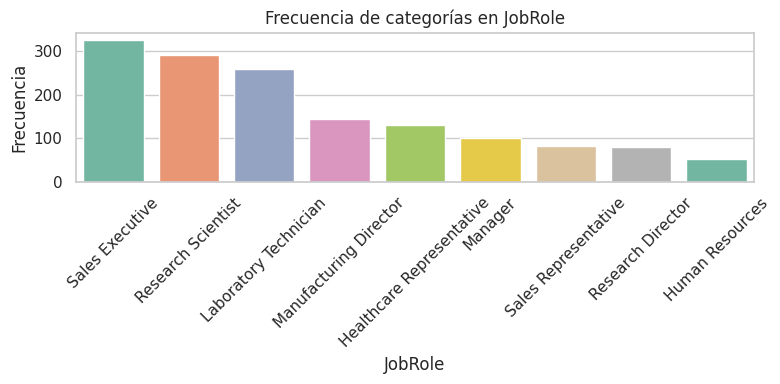

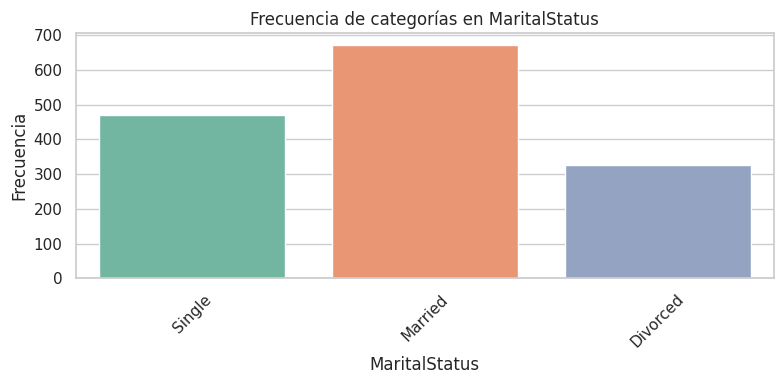

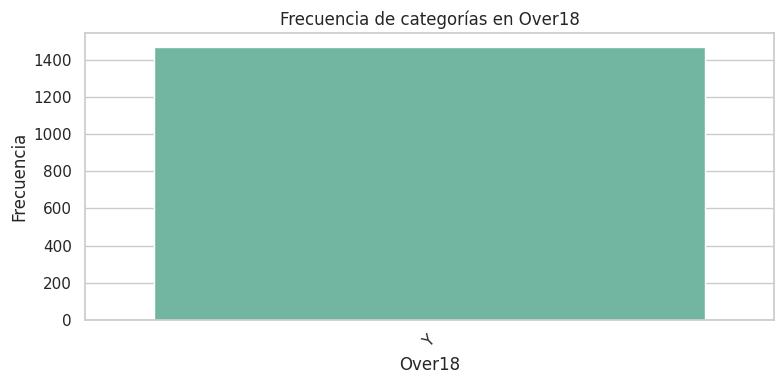

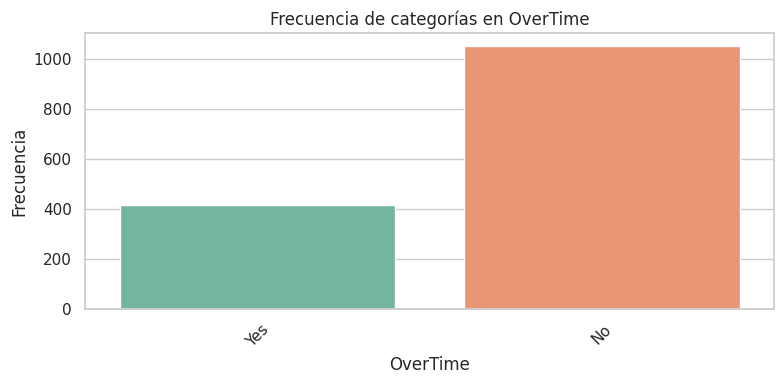

In [43]:
# Visualizaci√≥n de la distribuci√≥n de variables categ√≥ricas
# Este bloque genera gr√°ficos de barras (countplots) para cada columna categ√≥rica del dataset,
# permitiendo observar cu√°ntas veces aparece cada categor√≠a dentro de las variables analizadas.

for variable in categorias:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=variable, data=df, hue=variable, palette="Set2", legend=False)  # Se agrega 'hue' para evitar la advertencia
    plt.title(f'Frecuencia de categor√≠as en {variable}')
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Aqui se estan generando graficos de barras (countplots) para visualizar mas que nada la frecuencia de aparicion de cada categoria en las columnas categoricas del dataset.

Estos graficos proporcionan una vision rapida de las categorias en cada variable y ayudan a comprender mejor la distribucion de los datos antes de realizar un analisis mas profundo o construir modelos.




# Rotaci√≥n del personal

<ipython-input-45-1a638f4c6968>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.catplot(x="JobLevel", y="Attrition_binary", kind="bar", data=df, height=6, palette="coolwarm")


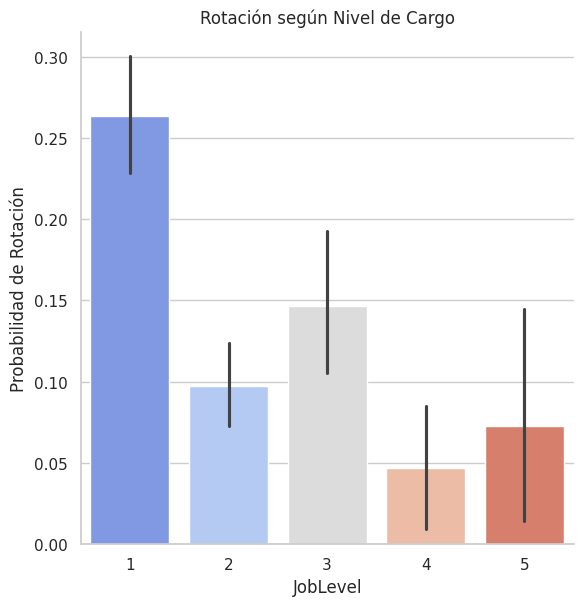

In [45]:
# Crear columna binaria para 'Attrition'
df['Attrition_binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Gr√°fico de barras por JobLevel con color personalizado
grafico = sns.catplot(x="JobLevel", y="Attrition_binary", kind="bar", data=df, height=6, palette="coolwarm")
grafico.set_ylabels("Probabilidad de Rotaci√≥n")
plt.title("Rotaci√≥n seg√∫n Nivel de Cargo")
plt.show()



En este codigo, se lleva a cabo un proceso de transformacion y visualizacion relacionado con la rotacion de empleados. Se creo un grafico de barras que muestra la probabilidad de rotacion de empleados segun el nivel de cargo (Joblevel). Use sns.catplot() para poder graficar como la rotacion varia con cada nivel de cargo. La probabilidad de rotacion esta representada en el eje y y el nivel de cargo en el eje x.

# Registro por rol

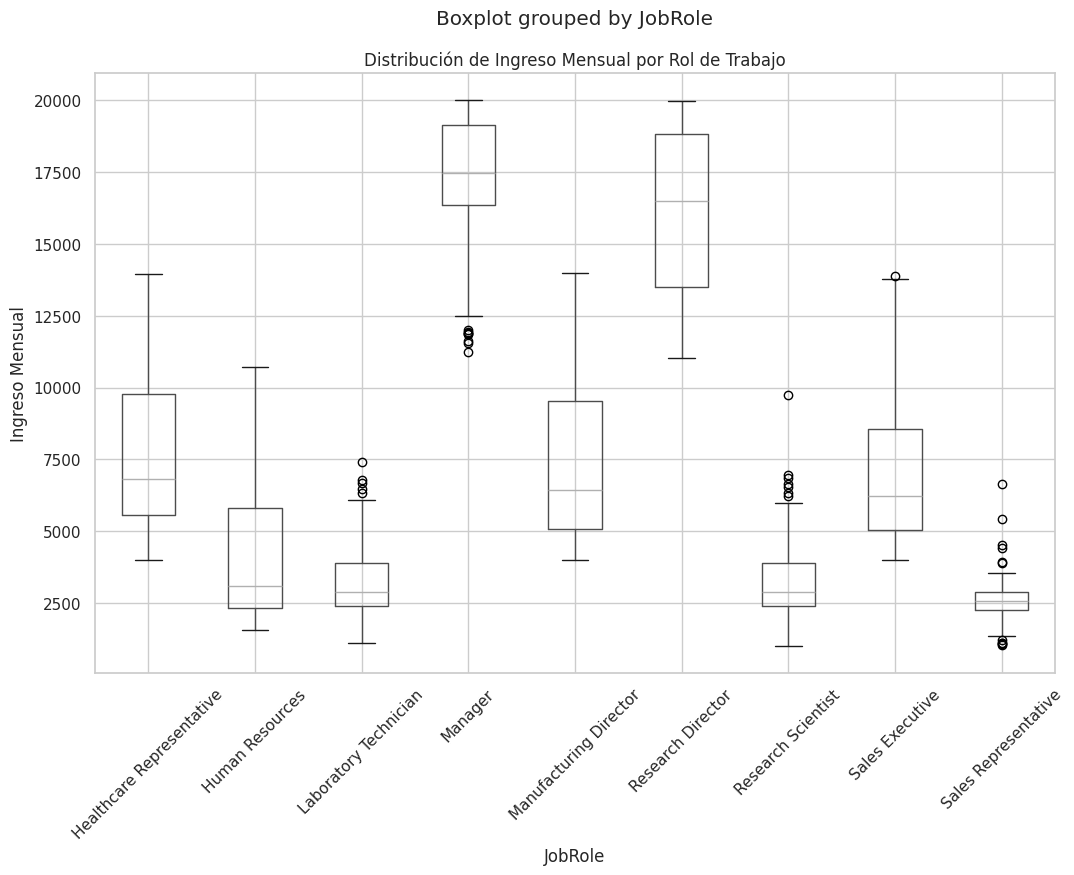

In [46]:
# Crear boxplot para comparar el ingreso mensual por rol de trabajo
df.boxplot(column="MonthlyIncome", by="JobRole")
plt.title("Distribuci√≥n de Ingreso Mensual por Rol de Trabajo")
plt.xticks(rotation=45)
plt.ylabel("Ingreso Mensual")
plt.show()


Este bloque crea un boxplot para comparar la distribucion de los ingresos mensuales (MonthlyIcome) entre diferentes roles de trabajo (JobRole). El boxplot permite visualizar la mediana, cuartiles, valores atipicos y la dispersion de los ingresos dentro de cada rol de trabajo, lo que ayuda a identificar las variaciones salariales entre los diferentes roles en la empresa.

# La relaci√≥n entre las variables n√∫mericas

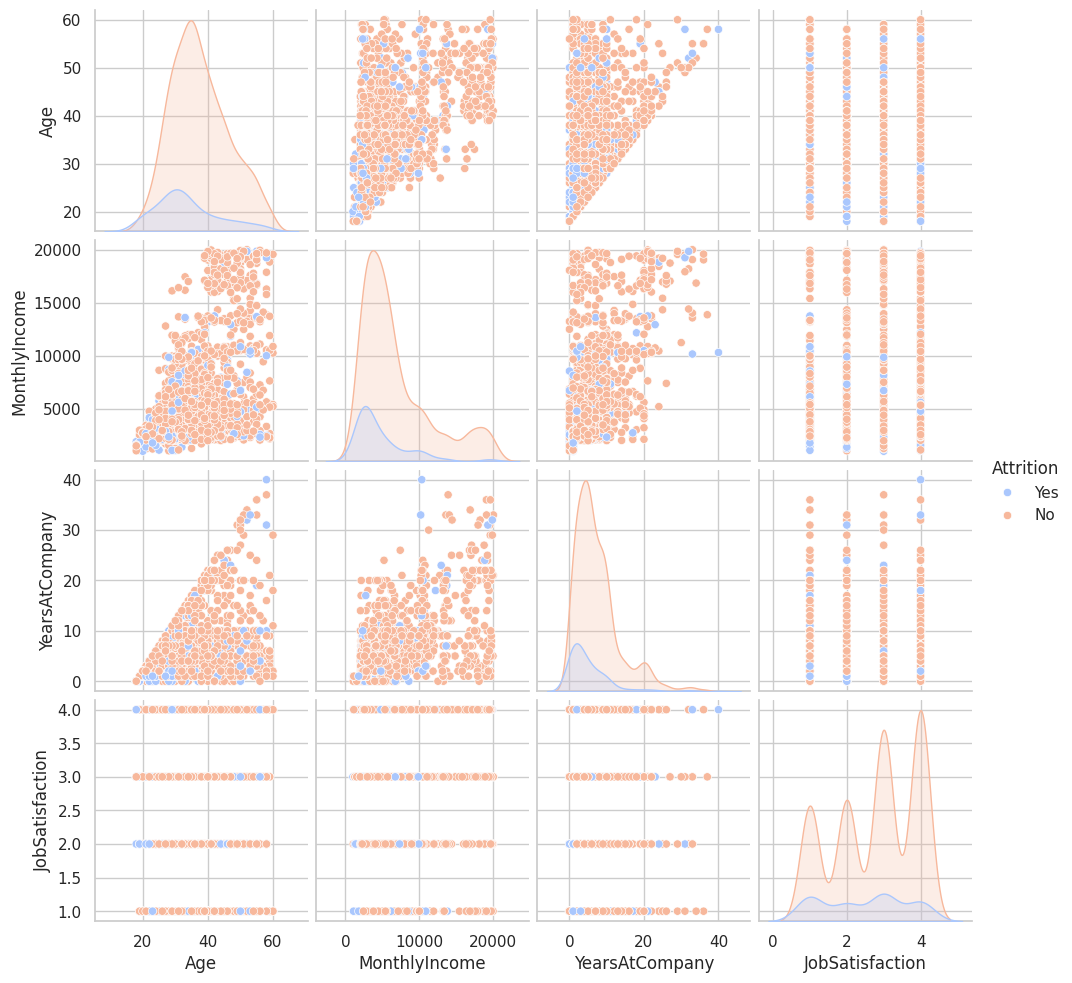

In [49]:
sns.pairplot(df[["Age", "MonthlyIncome", "YearsAtCompany", "JobSatisfaction", "Attrition"]], hue="Attrition", palette="coolwarm")
plt.show()


Este bloque crea un pairplot para observar las relaciones entre variables como la edad, ingreso mensual, a√±os en la empresa, satisfaccion laboral y rotacion. EL parametro hue="Attrition" colorea los puntos segun si el empleado ha rotado, facilitando la identificacion de patrones y diferencias entre empleados que han dejado la empresa y los que no.

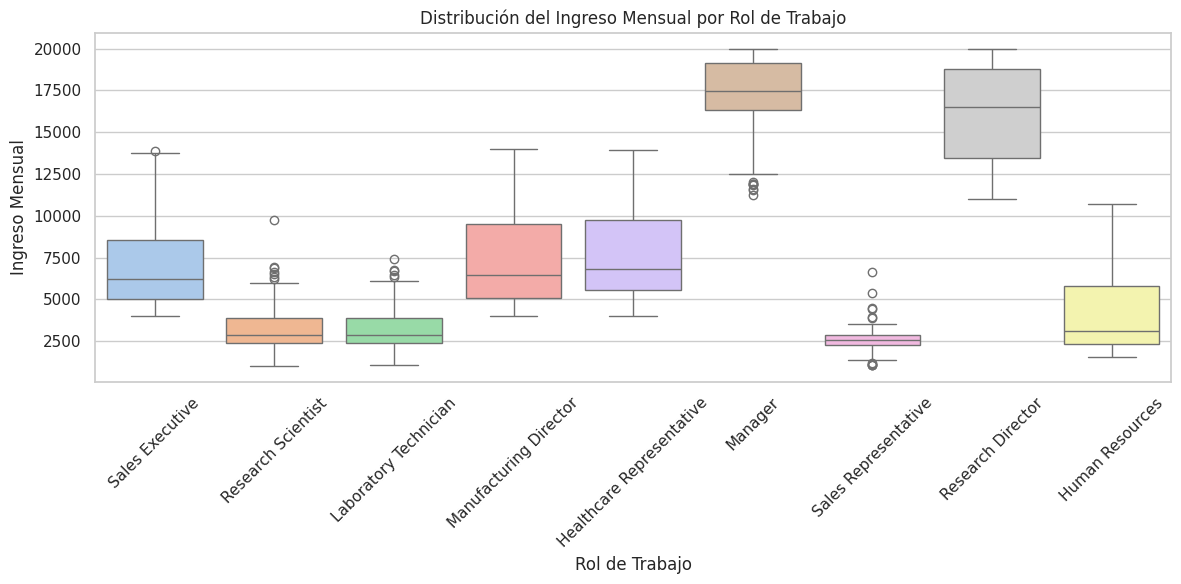


üìä Interpretaci√≥n del Gr√°fico Boxplot:
‚Ä¢ Cada caja representa la distribuci√≥n del ingreso mensual por tipo de rol en la empresa.
‚Ä¢ La l√≠nea dentro de la caja es la mediana (ingreso medio del grupo).
‚Ä¢ Los extremos de la caja indican el rango intercuart√≠lico (50% central de los datos).
‚Ä¢ Los puntos fuera de los bigotes son valores at√≠picos (sueldos muy altos o bajos).
‚Ä¢ Comparar las alturas de las cajas permite ver qu√© roles ganan m√°s o tienen m√°s variabilidad.


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gr√°fico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome', hue='JobRole', palette='pastel', legend=False)
plt.xticks(rotation=45)
plt.title('Distribuci√≥n del Ingreso Mensual por Rol de Trabajo')
plt.xlabel('Rol de Trabajo')
plt.ylabel('Ingreso Mensual')
plt.tight_layout()
plt.show()

# Explicaci√≥n del gr√°fico
print("\nüìä Interpretaci√≥n del Gr√°fico Boxplot:")
print("‚Ä¢ Cada caja representa la distribuci√≥n del ingreso mensual por tipo de rol en la empresa.")
print("‚Ä¢ La l√≠nea dentro de la caja es la mediana (ingreso medio del grupo).")
print("‚Ä¢ Los extremos de la caja indican el rango intercuart√≠lico (50% central de los datos).")
print("‚Ä¢ Los puntos fuera de los bigotes son valores at√≠picos (sueldos muy altos o bajos).")
print("‚Ä¢ Comparar las alturas de las cajas permite ver qu√© roles ganan m√°s o tienen m√°s variabilidad.")



# Conclusi√≥n:
El analisis muestra que la rotacion de empleados esta influenciada por factores como el nivel de cargo, los a√±os en la empresa, el salario y la satisfaccion laboral. Los empleados mas jovenes, con menores ingresos y menos tiempo en la empresa, tienen mayor probabilidad de rotacion. Las visualizaciones, como graficos de barras y boxplots, ayudan a identificar estos patrones, lo que puede guiar el dise√±o de estrategias de retencion centradas en los empleados de mayor riesgo.